In [139]:
from matplotlib import pyplot as plt
import numpy as np
import csv
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 

In [140]:
dataFrame = pd.read_csv('../dataset.csv')


In [141]:
trainSet  = dataFrame.iloc[:int(((len(dataFrame)*70)/100))]
testSet  = dataFrame.iloc[int(((len(dataFrame)*70)/100)):]
print(testSet)

         step      type      amount     nameOrig  oldbalanceOrg  \
4453834   323   PAYMENT    36803.44   C653758498           0.00   
4453835   323   PAYMENT    41815.13  C1154913534       11111.00   
4453836   323   CASH_IN   229384.36   C714505539       95395.00   
4453837   323   CASH_IN   109600.23  C1613588355      324779.36   
4453838   323   CASH_IN   174450.23   C279735836      434379.59   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
4453834            0.00  M2114359036            0.00            0.00        0   
4453835            0.00   M821726

In [142]:
dataFrame['merchant'] = dataFrame['nameDest'].str.contains('M')

dataFrame.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,merchant
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0,True
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0,True
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0,False
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0,False
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0,True
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0,True
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0,True
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0,True
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0,True
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0,False


In [143]:
dataFrame[['isFraud','merchant']].value_counts()

isFraud  merchant
0        False       4202912
         True        2151495
1        False          8213
dtype: int64

In [144]:
dataFrame['balancediffOrig'] = dataFrame['newbalanceOrig'] - dataFrame['oldbalanceOrg']
dataFrame['balancediffDest'] = dataFrame['newbalanceDest'] - dataFrame['oldbalanceDest']

dataFrame.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,merchant,balancediffOrig,balancediffDest
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0,True,-9839.64,0.00
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0,True,-1864.28,0.00
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0,False,-181.00,0.00
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0,False,-181.00,-21182.00
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0,True,-11668.14,0.00
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0,True,-7817.71,0.00
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0,True,-7107.77,0.00
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0,True,-7861.64,0.00
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0,True,-2671.00,0.00
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0,False,-5337.77,-1549.21


<AxesSubplot:xlabel='isFraud', ylabel='balancediffOrig'>

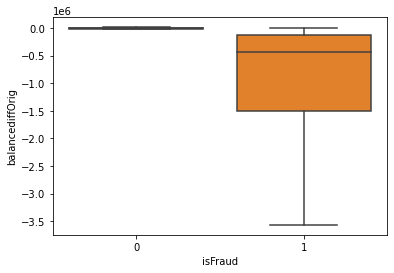

In [145]:
sns.boxplot(x="isFraud", y="balancediffOrig", data=dataFrame,showfliers=False)


<AxesSubplot:xlabel='isFraud', ylabel='balancediffDest'>

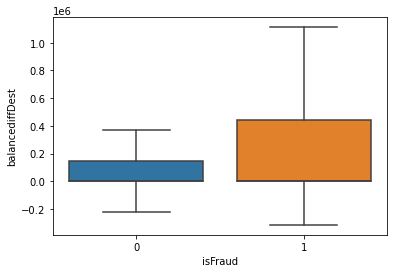

In [146]:
sns.boxplot(x="isFraud", y="balancediffDest", data=dataFrame, showfliers=False)

In [147]:
features = ['step',
            'type',
            'amount',
            'oldbalanceOrg',
            'newbalanceOrig',
            'oldbalanceDest',
            'newbalanceDest',
            'balancediffOrig',
            'balancediffDest',
            'merchant']

label = ['isFraud']


#3 new columns added (last 3)

In [148]:
#SPLITTING TYPE INTO COLUMNS
newCol = dataFrame[features]
fraudCol = dataFrame[label]
newCol = newCol.join(pd.get_dummies(newCol[['type']], prefix='type' )).drop(['type'], axis=1)
# newCol.head()
newCol['step'] = newCol['step']%24


#.drop is for deleting a specific column

In [149]:
X_train, X_test, y_train, y_test = train_test_split(newCol, fraudCol, test_size=0.3, random_state=1)
X_train.head(10)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,balancediffOrig,balancediffDest,merchant,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
6144590,17,171231.46,457.00,171688.46,54999.62,0.00,171231.46,-54999.62,False,1,0,0,0,0
3201282,9,2858.25,0.00,0.00,0.00,0.00,0.00,0.00,True,0,0,0,1,0
4110413,14,116720.40,5761211.23,5877931.63,524292.67,407572.28,116720.40,-116720.39,False,1,0,0,0,0
5179672,23,260323.97,110.00,0.00,3092811.53,3353135.50,-110.00,260323.97,False,0,1,0,0,0
4187011,17,66806.24,0.00,0.00,267095.59,333901.83,0.00,66806.24,False,0,1,0,0,0
3382843,15,133657.92,0.00,0.00,1490011.73,1623669.65,0.00,133657.92,False,0,1,0,0,0
375816,17,428258.98,0.00,0.00,3169980.02,3598239.00,0.00,428258.98,False,0,1,0,0,0
2492241,12,74174.03,8999680.63,9073854.66,274621.83,200447.80,74174.03,-74174.03,False,1,0,0,0,0
4703475,19,16554.56,107481.15,90926.59,0.00,0.00,-16554.56,0.00,True,0,0,0,1,0
6060817,20,39591.12,0.00,0.00,1057042.74,1096633.86,0.00,39591.12,False,0,1,0,0,0


In [158]:
dt_clf = DecisionTreeClassifier(random_state=1)

dt_clf = dt_clf.fit(X_train,y_train)

y_pred = dt_clf.predict(X_test)

In [168]:
result = pd.DataFrame({'actual':y_test['isFraud'], 'predicted':y_pred})
result[result['actual']==1]


,actual,predicted
6322570,0,0
3621196,0,0
1226256,0,0
2803274,0,0
3201247,0,0
...,...,...
2292206,0,0
5315196,0,0
1513756,0,0
4231316,0,0


In [209]:
print(metrics.classification_report(y_test, y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print('AUC:', metrics.auc(fpr, tpr))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906318
           1       0.88      0.88      0.88      2468

    accuracy                           1.00   1908786
   macro avg       0.94      0.94      0.94   1908786
weighted avg       1.00      1.00      1.00   1908786

AUC: 0.9385387242717831


([<matplotlib.patches.Wedge at 0x7fc2a5f5b280>,
 [Text(-1.0795583578320855, 0.21107759718854777, 'Accurate'),
  Text(1.4721250401446087, -0.28783305261771963, 'Inaccurate')],
 [Text(-0.5888500133629557, 0.11513323483011695, '93.9%'),
  Text(0.981416693429739, -0.1918887017451464, '6.1%')])

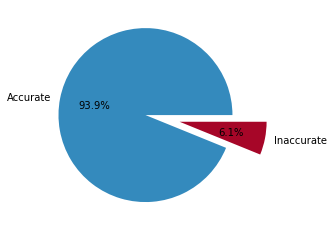

In [241]:
predicted=metrics.auc(fpr, tpr)*100
actual=100
plt.style.use("bmh")

lable=['Accurate','Inaccurate']
val=[predicted,actual-predicted]
explode=[0,0.4]
plt.pie(val,labels=lable,autopct='%1.1f%%',explode=explode)

In [178]:
importance = pd.DataFrame({'features':X_train.columns,'importance':dt_clf.feature_importances_}).sort_values(by=['importance'], ascending=False) 
importance

,features,importance
6,balancediffOrig,0.410467
5,newbalanceDest,0.154409
13,type_TRANSFER,0.081553
1,amount,0.078141
7,balancediffDest,0.060552
3,newbalanceOrig,0.058067
2,oldbalanceOrg,0.046879
0,step,0.042235
4,oldbalanceDest,0.039268
10,type_CASH_OUT,0.026622


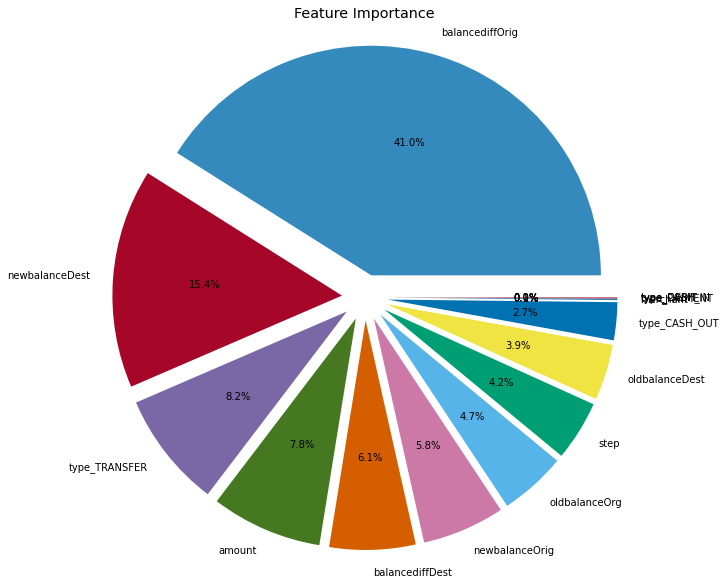

In [202]:
plt.style.use("bmh")
f = importance['features']
i = importance['importance']

# my_data = [value1,value2,value3,...]
# my_labels = 'label1','label2','label3',...

plt.figure(figsize=[10,10])
my_explode = (0.1, 0.1, 0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
plt.pie(i,labels=f,autopct='%1.1f%%',shadow=False,explode=my_explode)
plt.title('Feature Importance')
plt.axis('equal')
plt.show()